# Detecting low emissivity spots on copper grains images

This demo compares different blob detection algorithms included in the
Scikit-image library.
The goal of the comparison it to find the most suitable way to detect and track
the low emissivity spots on thermal images of copper grains.
The number of detected spots is a feature that characterizes different classes
of copper grains.

In [65]:
from math import sqrt

import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread

from img_processing import crop_ui, full_prepare


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Comparison function and description of given methods of blob detection

The comparison function receives an image and detects blobs on it utilizing
three alternative methods.
The first one `blob_log` is based on *Laplacian of Gaussian*.
According to the description provided by the library documentation it is the
most accurate and slowest one.
It calculates Gaussian of the image using various standard deviations and then
computes its Laplacians that are stacked in a cube.
The bright spots in the cube represent the maxims on the images, that means the
blobs.
This method is especially slow when detecting large blobs when the computations
are time consuming.
The second one, that is based on *difference of Gaussain* implemented as
`blobs_dog` is faster version of the first algorithm.
It computes simple *difference of Gaussian* instead of calculating derivatives.
The last function the `blobs_doh` is based on *determinant of Hessian*.
Hessian is a matrix of all second derivatives of a function.
The last algorithm is the fastest one, but it may fail to detect small blobs.

All functions take `threshold` parameter that determines their sensitivity.
The smaller it is the more likely it is that a group of pixels will be detected
as a blob.
With a `threshold` of 0.125 the first two algorithms happen to detect blobs
whereas the last function needs a threshold of 0.01 to find any blobs.
If all functions are given the same `threshold` the *Laplacian of Gaussian*
detects the largest number of blobs.
The second parameter `max_sigma` limits the size of detected blobs.
Because the spots with low emissivity are rather small, it is crucial to limit
this parameter.
The `blob_log` takes additional parameter `num_sigma` tells the function the
number of standard deviations for which the Gaussian of the image should be
calculated.

In [66]:
def compare_detection(img):
    '''
    Detect blobs in thermal images of grains using three methods
    and numbers of blobs.
    '''
    blobs_log = blob_log(img, max_sigma=2, num_sigma=10, threshold=.125)
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

    blobs_dog = blob_dog(img, max_sigma=2, threshold=.125)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

    blobs_doh = blob_doh(img, max_sigma=2, threshold=.01)
    blobs_doh[:, 2] = blobs_doh[:, 2] * sqrt(2)

    return [blobs_log, blobs_dog, blobs_doh]

## Plotting the comparison

We will load and prepare sample image, that will be used compare blob detection
algorithms.
A second cropped image is also needed for plotting the comparison.

In [67]:
sample_img = imread('img/104_E5R_0.jpg')
img_crop = crop_ui(rgb2gray(sample_img))
img_prep = full_prepare(sample_img)

Now we call the comparison function on the prepared image.
It will return a list containing blobs detected on images using different
methods.

In [68]:
blob_list = compare_detection(img_prep)

At last we can plot the comparison on subplots and show number of detected blobs
in the titles.

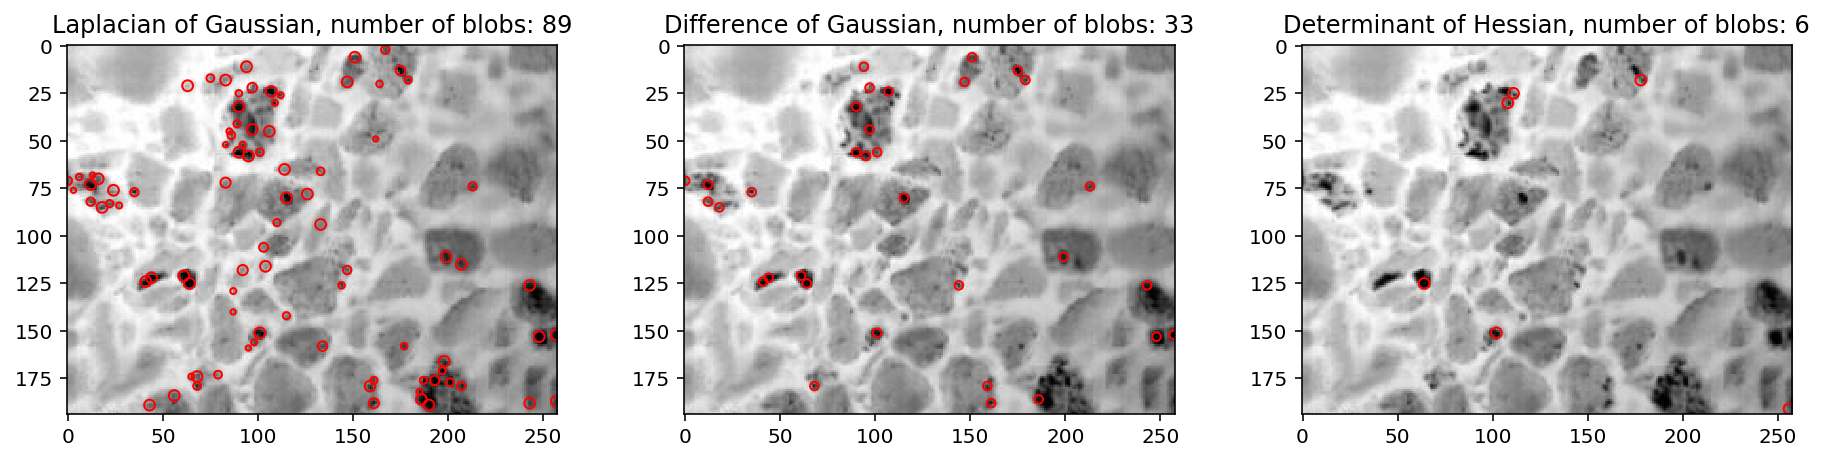

In [70]:
titles = ('Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian')

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
ax = axes.ravel()
loop_set = zip(blob_list, colors, titles)
for idx, (blobs, color, title) in enumerate(loop_set):
    ax[idx].set_title('{}, number of blobs: {}'.format(title, len(blobs)))
    ax[idx].imshow(img_crop, cmap=plt.get_cmap('gray'))
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='r', linewidth=1, fill=False)
        ax[idx].add_patch(c)

plt.tight_layout()
plt.show()

# Conclusion and final choice of the best method to detect spots with low emissivity

The results clearly show that the *Laplacian of Gaussian* is the most suitable
to detect the blobs.
This observation matches the previously presented description of given methods.
The `blob_log` is the most accurate and since the size of detected blobs is
limited it doesn't perform slow operations to detect larger dots.